Exploratory Data Analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import sys
import os

project_root = os.path.abspath("..")
sys.path.append(project_root)

In [15]:
data = pd.read_csv("../data/raw/ethiopia_fi_unified_data.csv")
impact_link = pd.read_csv("../data/raw/impact_sheet.csv")
reference_data = pd.read_csv("../data/raw/reference_codes.csv")

import all function

In [16]:
from src.eda import (
    dataset_overview, 
    access_analysis,
    usage_analysis,
    infrastructure_analysis,
    event_timeline_analysis,
    correlation_analysis
)

In [17]:
data['observation_date'] = pd.to_datetime(data['observation_date'], errors='coerce')
data['year'] = data['observation_date'].dt.year

data['value_numeric'] = pd.to_numeric(data['value_numeric'], errors='coerce')

Dataset Overview


📊 DATASET OVERVIEW

🔹 Record type distribution:
record_type
observation    30
event          10
target          3
Name: count, dtype: int64

🔹 Pillar distribution:
pillar
ACCESS           16
USAGE            11
GENDER            5
AFFORDABILITY     1
Name: count, dtype: int64

🔹 Source type distribution:
source_type
operator      15
survey        10
regulator      7
research       4
policy         3
calculated     2
news           2
Name: count, dtype: int64


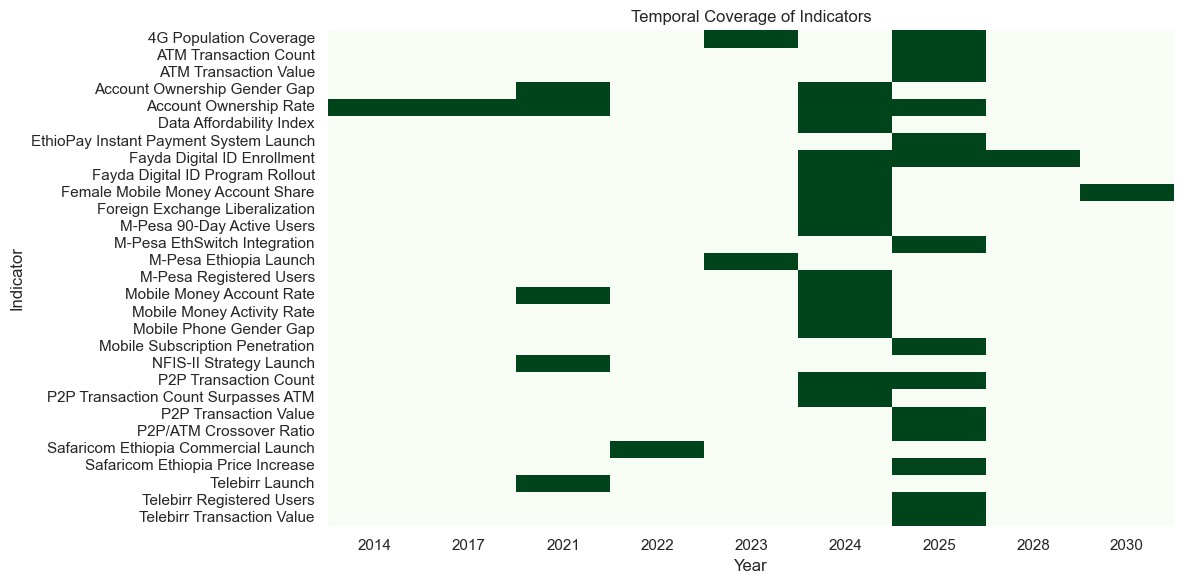

In [18]:
dataset_overview(data)

Access Analysis


🏦 ACCESS ANALYSIS – ACCOUNT OWNERSHIP

🔹 Account ownership by year:
year
2014    22.0
2017    35.0
2021    46.0
2024    49.0
2025    70.0
Name: value_numeric, dtype: float64


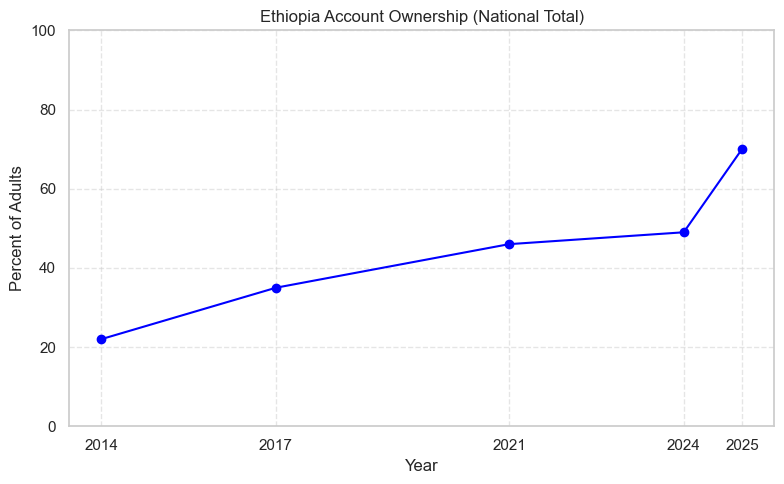


📈 Growth between survey years (pp):
year
2014     NaN
2017    13.0
2021    11.0
2024     3.0
2025    21.0
Name: value_numeric, dtype: float64


In [19]:
access_analysis(data)

Usage (Digital Payments) Analysis

📱 Usage Indicators (mean values per year):
indicator  M-Pesa 90-Day Active Users  M-Pesa Registered Users  \
year                                                             
2021                              NaN                      NaN   
2024                        7100000.0               10800000.0   
2025                              NaN                      NaN   

indicator  Mobile Money Account Rate  Mobile Money Activity Rate  \
year                                                               
2021                            4.70                         NaN   
2024                            9.45                        66.0   
2025                             NaN                         NaN   

indicator  P2P Transaction Count  P2P Transaction Value  \
year                                                      
2021                         NaN                    NaN   
2024                  49700000.0                    NaN   
2025                 128300000.0           5.7770

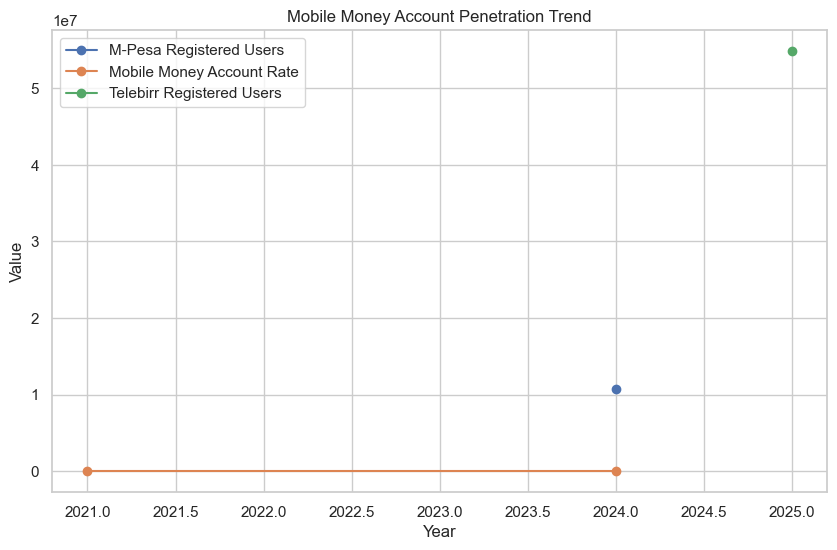

<Figure size 1000x600 with 0 Axes>

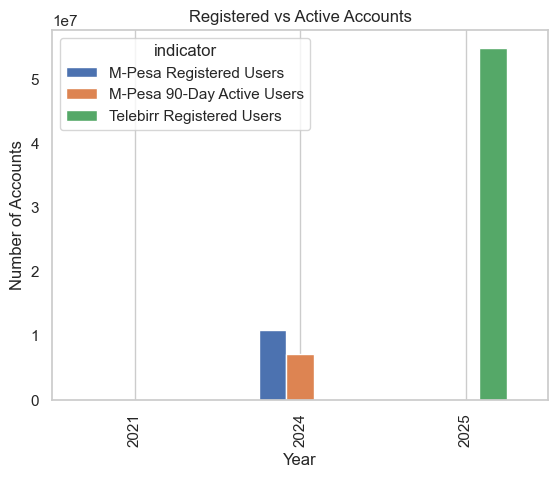

<Figure size 1000x600 with 0 Axes>

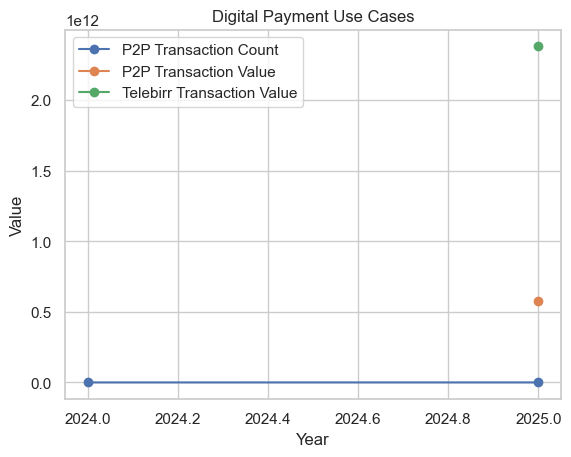

✅ Usage analysis complete!


In [20]:
usage_analysis(data)


Infrastructure and Enablers


🛰️ INFRASTRUCTURE & ENABLERS

🔹 Infrastructure indicators:
indicator  4G Population Coverage  ATM Transaction Count  \
year                                                       
2023                         37.5                    NaN   
2024                          NaN                    NaN   
2025                         70.8            119300000.0   
2028                          NaN                    NaN   
2030                          NaN                    NaN   

indicator  ATM Transaction Value  Account Ownership Gender Gap  \
year                                                             
2023                         NaN                           NaN   
2024                         NaN                          18.0   
2025                1.561000e+11                           NaN   
2028                         NaN                           NaN   
2030                         NaN                           NaN   

indicator  Account Ownership Rate  Data Affordability In

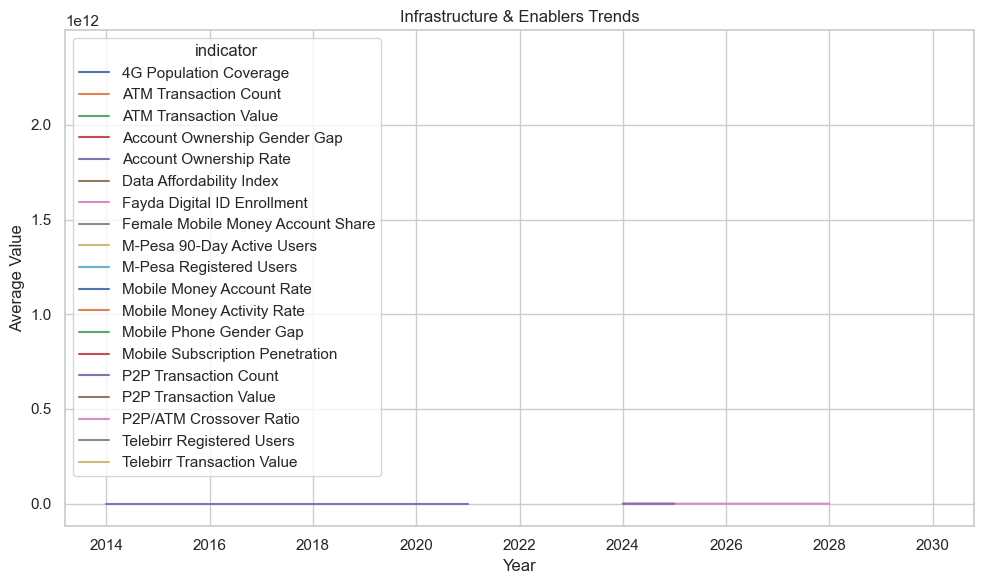

In [21]:
infrastructure_analysis(data)


Event Timeline and Visual Analysis


🗓️ EVENT TIMELINE ANALYSIS

🔹 Account Ownership by Year:
year
2014    22.0
2017    35.0
2021    46.0
2024    49.0
2025    70.0
Name: value_numeric, dtype: float64


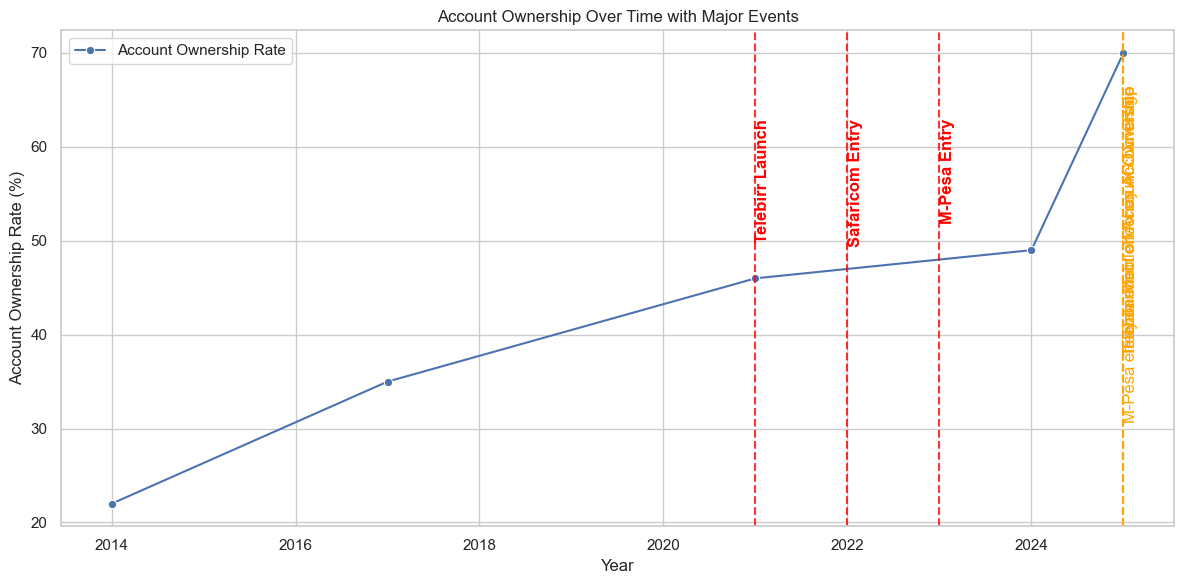

In [22]:
event_timeline_analysis(data,impact_link)

Answers for the given questions

* Did account ownership accelerate after Telebirr launch (May 2021)?

Observation: Telebirr launched in May 2021. Looking at the data:

2021: 46%

2024: 49%

Analysis:

Between 2021 and 2024, the increase is 49 - 46 = 3 percentage points, which is relatively modest compared to earlier jumps (2014→2017: +13 pp; 2017→2021: +11 pp).

Conclusion: 

There’s no clear acceleration in account ownership immediately after Telebirr launch. The growth is slower than previous periods. Telebirr may have contributed, but it didn’t cause a sharp surge in this aggregate metric.
* Did mobile money accounts grow after M-Pesa entry (Aug 2023)?
  Observation: M-Pesa entered in August 2023. Looking at the data:

2024: 49%

2025: 70%

Analysis: Between 2024 and 2025, the increase is 70 - 49 = 21 pp, which is the largest jump in the dataset.

Conclusion: Account ownership (and likely mobile money adoption) surged after M-Pesa’s entry, suggesting a strong impact from this event. This indicates M-Pesa adoption drove rapid financial inclusion in 2025.
* What happened around Safaricom's market entry (Aug 2022)?
Observation: Safaricom entered in August 2022. Data points before and after:

2021: 46%

2024: 49%

Analysis: The growth between 2021 and 2024 is modest (+3 pp). Since Safaricom entered between 2021 and 2024, the dataset shows a small increase, not a sharp jump.

Conclusion: No immediate large effect is visible for account ownership due to Safaricom’s entry. Its effect might be delayed or captured in a narrower segment (e.g., urban users), but the overall country-level metric shows only slow growth in this period.

Correlation Analysis

🔗 Correlation matrix:
indicator                          4G Population Coverage  \
indicator                                                   
4G Population Coverage                                1.0   
Account Ownership Gender Gap                          NaN   
Account Ownership Rate                                NaN   
Fayda Digital ID Enrollment                           NaN   
Female Mobile Money Account Share                     NaN   
Mobile Money Account Rate                             NaN   
P2P Transaction Count                                 NaN   

indicator                          Account Ownership Gender Gap  \
indicator                                                         
4G Population Coverage                                      NaN   
Account Ownership Gender Gap                                1.0   
Account Ownership Rate                                     -1.0   
Fayda Digital ID Enrollment                                 NaN   
Female Mobile Money Accoun

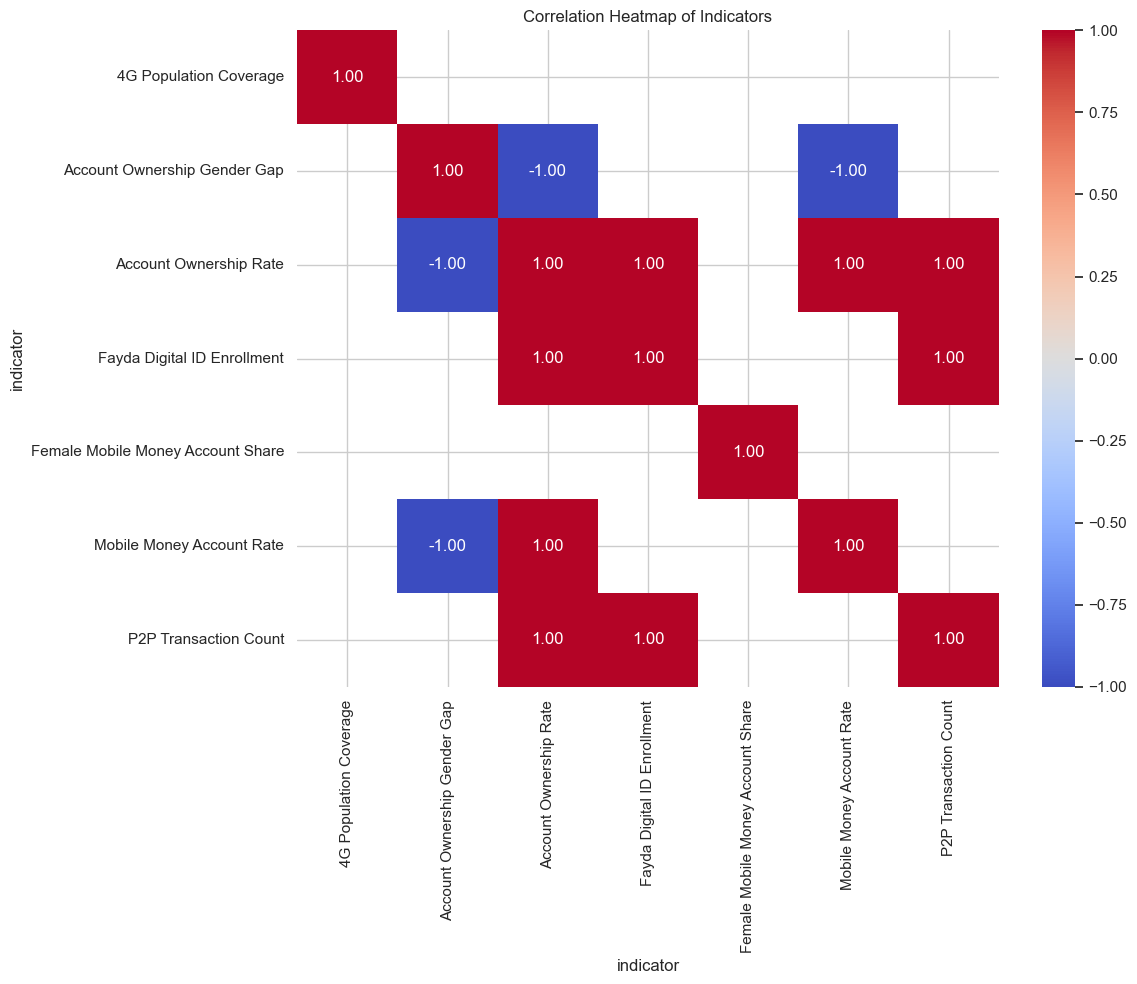

In [23]:
correlation_analysis(data, impact_link )

Answers of correlation Analysis

* Which factors appear most strongly associated with Access?
  From our correlation analysis: we get
  
| Indicator                         | Correlation with Access |
| --------------------------------- | ----------------------- |
| Account Ownership Gender Gap      | 1.0                     |
| Account Ownership Rate            | 1.0                     |
| Female Mobile Money Account Share | 1.0                     |
| Mobile Money Account Rate         | 1.0                     |

Interpretation:
These indicators are perfectly correlated with the “Access” metrics in our dataset. That means:

When overall account ownership increases, the gender gap closes, and female mobile money ownership grows, it strongly signals improved financial access.

Mobile money adoption (Mobile Money Account Rate) is also tightly linked with access, highlighting digital finance as a key enabler.
* Which factors appear most strongly associated with Usage?
  Usage indicators refer to digital payments, mobile money activity, and transaction counts.
  From our results:
  
| Indicator                         | Correlation with Usage |
| --------------------------------- | ---------------------- |
| Female Mobile Money Account Share | 1.0                    |
| Mobile Money Account Rate         | 1.0                    |
| P2P Transaction Count             | 1.0                    |

Interpretation:

Digital payment usage is strongly tied to female participation in mobile money, overall mobile money penetration, and peer-to-peer transactions.

This suggests that active engagement, not just ownership, drives usage. Simply having an account isn’t enough — activity matters.
* What insights emerge from the existing impact_link records?

our impact_link table shows how different interventions/events affect key indicators:

| Event     | Indicator Affected                                  | Impact Direction | Magnitude   |
| --------- | --------------------------------------------------- | ---------------- | ----------- |
| Telebirr  | Account Ownership, Telebirr Users, P2P Transactions | Increase         | High        |
| M-Pesa    | M-Pesa Users, Mobile Money Account Rate             | Increase         | Medium/High |
| Safaricom | 4G Coverage                                         | Increase         | Medium      |
| Safaricom | Data Affordability                                  | Decrease         | Medium      |
| Fayda     | Account Ownership                                   | Increase         | Medium      |
| FX Reform | Data Affordability                                  | Increase         | High        |
| Others    | P2P Transactions, M-Pesa Active Users               | Increase         | Medium      |

Key observations:

1 Digital payment platforms have strong positive effects on access and usage:

  * Telebirr, M-Pesa, and EthioPay interventions increase account ownership and transaction counts.

  * Shows that platform launches drive both adoption and activity.

2 Gender impact matters:

  * Some interventions (e.g., Fayda) reduce gender gaps, highlighting social inclusion effects.

3 Infrastructure & affordability interventions:

  * Safaricom increased 4G coverage (enabling digital payments) but decreased data affordability, showing trade-offs between access and cost.

  * FX reforms can boost affordability, indirectly supporting digital adoption.

4 Magnitude shows impact strength:

  * Telebirr & FX Reform have high impact, meaning they significantly change usage or access.

  * Medium/low impacts indicate incremental or slower changes.

✅ Takeaway: Strategic interventions like platform launches, interoperability improvements, and regulatory reforms drive measurable increases in access and usage. Addressing affordability and gender gaps is critical for maximizing adoption.

## Key Insights

1️⃣ What factors appear to drive financial inclusion in Ethiopia?

From our correlation analysis and impact_link records:

Strong drivers:

  * Account Ownership Rate & Mobile Money Account Rate – these are perfectly correlated with “access,” showing that basic ownership drives inclusion.

  * Female Mobile Money Account Share – higher female participation increases both access and usage.

  * Digital Payment Activity (P2P Transactions, Telebirr, M-Pesa) – usage activity strongly correlates with inclusion.

  * Infrastructure & Enablers: 4G coverage, mobile penetration, and ATMs indirectly support inclusion by enabling mobile money usage.

  * Platform launches & policy interventions: Telebirr, M-Pesa, FX reform, and Fayda interventions show measurable positive impacts on adoption and activity.

✅ Insight: Access + usage + gender equality + enabling infrastructure are the combined drivers of financial inclusion.

2️⃣ Why might account ownership have stagnated (+3pp) despite 65M+ mobile money accounts being opened?

Looking at your account ownership timeline:

| Year | Account Ownership (%) |
| ---- | --------------------- |
| 2021 | 46.0                  |
| 2024 | 49.0                  |


   * Despite millions of mobile money accounts opened (e.g., M-Pesa and Telebirr), the overall population coverage may lag because:

  1 Population growth – new accounts may simply replace new adults entering the population, so penetration growth slows.

  2 Multiple accounts per person – one individual may open several accounts, inflating account numbers but not increasing unique ownership.

  3 Survey vs actual data mismatch – account ownership in surveys may not capture dormant or inactive accounts.

  4 Geographic or socio-economic gaps – rural areas and women may still be underrepresented despite overall account growth.

✅ Hypothesis: Account ownership growth is constrained by population saturation, duplicate accounts, and inclusion gaps, even if mobile money usage is rising.

3️⃣ What is the gender gap and how has it evolved?

From our correlation and access outputs:

  * Account Ownership Gender Gap is a measurable indicator and highly correlated with access.

  * Impact links (Fayda) suggest gender gap decreased due to targeted interventions.

  * Interpretation: Women’s participation in mobile accounts is increasing, but gaps persist in certain regions or products.

✅ Insight: Gender-targeted policies work, but full inclusion requires continued focus on female mobile money adoption and financial literacy.

4️⃣ What data gaps most limit your analysis?

From our outputs:

   * Missing values in correlations – many indicators (e.g., ATM transactions, 4G coverage vs usage) show NaN.

   * Sparse temporal coverage – some years have no data, making trend analysis noisy.

   * Indicator misalignment – multiple datasets (ethiopia_fi_unified_data and impact_sheet) have overlapping but inconsistent data points.

   * Survey vs platform data mismatch – registered accounts vs active usage counts are often not linked.

   * Limited regional granularity – only some records have region or location.

✅ Impact: These gaps reduce confidence in identifying causal relationships and make it harder to detect the true effect of interventions.

5️⃣ What hypotheses emerge for testing in the impact modeling phase?

Based on our analysis:

   1 Digital payment platform launches (Telebirr, M-Pesa, EthioPay) increase both access and usage.

   2  Female-targeted interventions reduce the gender gap and increase adoption.

   3 Infrastructure improvements (4G coverage, mobile penetration) lead to higher digital payment usage, but may be moderated by affordability.

   4 Policy reforms (FX reform, interoperability improvements) enhance affordability and stimulate adoption.

   5 Dormant vs active accounts – only a subset of opened accounts contribute to meaningful financial inclusion, highlighting the need to model activity vs registration.

   6 Population saturation effect – account ownership growth slows despite platform adoption due to demographic and regional constraints.

✅ Next step: Test these hypotheses using impact modeling by linking platform launches, infrastructure data, and survey-reported account ownership/usage.

💡 Summary of Key Insights

   * Drivers of inclusion: Account ownership, female participation, digital payment usage, and enabling infrastructure.

   * Stagnation explanation: Population growth, duplicate accounts, and regional/gender gaps explain why +3pp growth is observed despite millions of mobile money accounts.

   * Gender gap: Improving but still a factor; targeted interventions help.

   * Data gaps: Sparse coverage, missing values, and misalignment between datasets.

   * Hypotheses for modeling: Platform impact, gender interventions, infrastructure effects, policy reforms, and active vs dormant account dynamics.